# Data Engineer Assessment
## UC01: TTD_DE_UC01_EDA: Perform `Exploratory Data Analysis (EDA)` on provided CSV data

## Summary
This assessments evaluate the capabilities of the candidate in solving data engineering use cases. The candidate is required to solve the below assessment questions using a Jupyter notebook and post the solutions in the notebook in the assessment section.  

Each assessment is structured as a collection of one or more scenarios that need to be addressed by the data engineer.


* __Problem Statement__ - Business users have asked the data engineers to assist with exploratory data analysis to enable business make informed decisions.
* __Description__ - Business would like to perform `Exploratory Data Analysis` on the dataset as part of reporting and also to prepare data for Machine Learning purposes.  
The business user has recently joined the organization and is unfamiliar with the data and has asked the data engineer to just assist with the review of the data so that they generate reports together.

The business user would first like to explore the data and see if there are any patterns in the data that can be used for reporting.


## Code Complexity
- Low / Medium


## `Diagram - Also refer PDF in folder`

![Exploratory Data Analysis](./TTD_UC01_EDA.png "Exploratory Data")



## Datasets:

`File Location`: Refer to the attached `data` folder for information

* Vehicles (vehicles.csv)  at the plants (plants.csv) are built to order (orders.csv) placed - order_number
* Vehicles are manufactured at different Company plants (plants.csv)-  (plant_code_id)
* Customer (customers.csv) provides reviews(welcome_call.csv) 60 to 80 days after the vehicles are delivered(vin)
* Orders (orders.csv) are logged by sales_rep_number at various BMW dealerships.
* Sales (sales_rep.csv) representatives are linked to dealership (dealers.csv) and have dealership names




## Perform the following joins:

* Link all the data based on the statements made above to create a larger dataset that answers the below questions.
* Identify any duplicates in the data and perform cleanup of the duplicates. Just drop the duplicates columns.
* The Dataset must contain vehicles linked to the order, sentiments, sales people, plants
* Provide the name of the sales person (first_name, last_name and sales_number the dealership)



## Questions: `Exploratory Data Analysis - Provide graphs for options below and document your observations in markdown. `

1. Perform `Exploratory data analysis` and provide insights into the data.
2.  Provide the distribution by brand, model, iso_country.
3. Provide the percentage of customers that have purchased more than 1 car.
4.  Provide the distribution of the vehicles manufactured by the plants and provide information brand, model  etc.
5.  Provide the top sales peoples per dealership - 10 top sales people
6.  Indicate the total sales per dealership.
7.  Get the models of the cars that had the most positive reviews (reviews greater than 3.5)
8.  Provide a distribution of the vehicles by different status.
9.  List all the dealerships that have sold the Rolls-Royce brand.




## Libraries or Options used
* Jupyter Notebook - Install and run locally on your laptop or device.
* PySpark, Pandas and matplot lib or similar plotting libraries.
* Other Python libraries required for Exploratory Data Analysis



## `Acceptance Criteria`
The following acceptance criteria must be met:

1. Perform Exploratory data Analysis and present your results as observations.
2. Python Graph libraries must be used to plot graphs to support your findings.
3. Comment your notebook file with markdown indicating observations: and write statements to indicate your observations.
4. Perform Analysis fo the Data using Spark or Pandas

# Implementation

Provide all the implementation steps in the sections that follow. Ensure that you provide detailed explanations of the approach.


### Import the libraries that you need for EDA

In [3]:
# Import any relevant libraries
import os
import re
import numpy as np
import pandas as pd
# Import other EDA libraries that you need below

import matplotlib.pyplot as plt
import seaborn as sns

#### List of expected dataframes to be loaded


  * Vehicles (vehicles.csv) at the plants (plants.csv) are built to order (orders.csv) placed - order_number
  * Vehicles are manufactured at different Company plants (plants.csv)- (plant_code_id)
  * Customer (customers.csv) provides reviews(welcome_call.csv) 60 to 80 days after the vehicles are delivered(vin)
  * Orders (orders.csv) are logged by sales_rep_number at various BMW dealerships.
  * Sales (sales_rep.csv) representatives are linked to dealership (dealers.csv) and have dealership names



### Load the data from the data folder into the data frame.

#### Read the 6 datasets into dataframes

In [4]:
# Write your code below to load the relevant data into a data frame
vehicles_df = pd.read_json("data/vehicles.json")
plant_df = pd.read_json("data/plants.json")
customers_df = pd.read_json("data/customers.json")
orders_df = pd.read_json("data/orders.json")
sales_df = pd.read_json("data/sales_person.json")
dealers_df = pd.read_json("data/dealers.json")


#### Apply info, shape, describe, and find the number of missing values in the data.

##### Vehicles Information

In [10]:
print(vehicles_df.head())
print('')
print(vehicles_df.info())
print('')
print(vehicles_df.describe())
print('')
print(vehicles_df.shape)
print('')
print(vehicles_df.isnull().sum().sort_values(ascending=False))

                 vin    order_number model_key paint_code  \
0  1G8MG31X28U3Y1GZM  ORDIN4B327A623      JXJM       BL2C   
1  JTMEF4DV3APN2DT3U  ORDINA32307615      MSR3       SOME   
2  1GTGC79T63PH98L8U  ORDIN974391495      CRTM       SKYG   
3  3GTU1WF20BB5DG9P1  ORDINBA0C53437      JXJM       STRM   
4  JM1BK22F84X3VRH36  ORDIN179530629      JXJM       ERED   

                paint_descr         make     model                   category  \
0   BLACK SAPPHIRE METALLIC          BMW        X1                        SUV   
1        SUNSET ORANGE BLUE          BMW  3 Series                      Sedan   
2  SKYSCRAPER GRAU METALLIC  Rolls-Royce   Phantom  Sedan, Coupe, Convertible   
3        STORM BAY METALLIC          BMW  3 Series  Sedan, Coupe, Convertible   
4       EXOTIC METALLIC RED          BMW  4 Series  Convertible, Sedan, Coupe   

         brand              fuel_type  ...  prod_plant_id production_country  \
0          BMW                 diesel  ...            P06         

* There are 193704 rows and 25 columns.
* There are no null values in the data set.

##### Plant Information

In [11]:
print('---------- Plant Information -----------')
print(plant_df.head())
print('')
print(plant_df.info())
print('')
print(plant_df.describe())
print('')
print(plant_df.shape)
print(plant_df.isnull().sum().sort_values(ascending=False))

---------- Plant Information -----------
  plant_id                       plant_name        country iso_country_code  \
0      P01           BMW Group Plant Munich        Germany               DE   
1      P02          BMW Group Plant Rosslyn   South Africa               ZA   
2      P03      BMW Group Plant Spartanburg  United States               US   
3      P04             BMW Plant Dingolfing        Germany               DE   
4      P05  BMW Group Plant San Luis Potosi  United States               US   

                                         address  
0                           BMW Munich, BMW Welt  
1  BMW Rosslyn Industrial Estate, Pretoria North  
2    BMW Plant Spartanburg, Spartanburg, SC29304  
3     BMW Plant Dingolfing, Landshuter Str, 2798  
4   BMW Group Plant San Luis Potosi, Mexico, USA  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------

* There are 8 rows and 5 columns.
* There are no null values in the data set loaded from json file.

##### Customer Information

In [12]:
print('---------- Customers Information -----------')
print(customers_df.head())
print('')
print(customers_df.info())
print('')
print(customers_df.describe())
print('')
print(customers_df.shape)
print(customers_df.isnull().sum().sort_values(ascending=False))

---------- Customers Information -----------
    customer_id first_name    last_name                  company     sex  \
0  CNIN29159162    Lakshay     Krishnan                 Personal  female   
1  CNIN9CCF4863    Samaira  Subramaniam  Kannan, Shetty and Mann  female   
2  CNIN48C97855     Jhanvi          Tak                 Personal    male   
3  CNIN37D52675    Dishani  Chakrabarti                 Personal  female   
4  CNINE85AD876     Jhanvi       Thaker                 Personal  female   

  date_of_birth                              customer_address  \
0    1983-04-04  H.No. 776\nVala Street, Visakhapatnam 873845   
1    1994-04-04    H.No. 139, Sankaran Street, Nellore-174106   
2    1999-03-17                       35\nDar, Khandwa-004766   
3    1990-01-20              77/08, Dhar Zila\nBelgaum-709476   
4    1975-01-20      29/68, Venkataraman Nagar, Khora -674813   

            street_address country       city iso_country_code contact_number  \
0          32, Sarraf Ganj

* There are 129038 rows and 15 columns.
* There are no null values in the data set loaded from json file.

##### Orders Information

In [13]:
print(orders_df.head())
print('') 
print(orders_df.info())
print('')
print(orders_df.describe())
print('')
print(orders_df.shape)
print(orders_df.isnull().sum().sort_values(ascending=False))

     order_number   customer_id sales_rep_number dealer_number  \
0  ORDIN4B327A623  CNIN29159162    SNIN281695106     DNIN28169   
1  ORDINA32307615  CNIN9CCF4863    SNIN386702881     DNIN38670   
2  ORDIN974391495  CNIN9CCF4863    SNIN317855261     DNIN31785   
3  ORDINBA0C53437  CNIN48C97855    SNIN252727200     DNIN25272   
4  ORDIN179530629  CNIN37D52675    SNIN170344819     DNIN17034   

  iso_country_code  order_date order_status  
0               IN  2010-08-03    delivered  
1               IN  2004-03-22    delivered  
2               IN  2004-10-19    delivered  
3               IN  2006-12-20    delivered  
4               IN  2022-07-27  in progress  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193705 entries, 0 to 193704
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_number      193705 non-null  object
 1   customer_id       193705 non-null  object
 2   sales_rep_number  19370

* There are 193705 rows and 7 columns.
* There are no null values in the data set loaded from json file.

##### Sales Information

In [14]:
print(sales_df.head())
print('')
print(sales_df.info())
print('')
print(sales_df.describe().transpose())
print('')
print(sales_df.shape)
print(sales_df.isnull().sum().sort_values(ascending=False))

    sales_number first_name last_name  personnel_number employment_type  \
0  SNIN281693284     Akarsh    Bakshi  EMIN28169BMW5779       permanent   
1  SNIN281691801   Divyansh      Goel  EMIN28169BMW5980      contractor   
2  SNIN281694483       Pari      Bedi  EMIN28169BMW5854       permanent   
3  SNIN281698547    Lakshit      Anne  EMIN28169BMW3331       permanent   
4  SNIN281695106      Jayan      Bora  EMIN28169BMW5583      contractor   

  department_code dealer_number     sex date_of_birth  \
0           FSP02     DNIN28169    male    1998-04-01   
1           FSP02     DNIN28169    male    1991-01-11   
2           FSP01     DNIN28169    male    1995-09-20   
3           FSP09     DNIN28169  female    1978-06-04   
4           FSP02     DNIN28169  female    1994-01-17   

                                    customer_address        street_address  \
0                 57/80\nGoyal Road\nAmritsar 583649      50/582\nBir Marg   
1              83/360, Chawla Ganj\nAmbarnath 6374

* There are 14181 rows and 17 columns.
* There are no null values in the data set loaded from json file.

##### Dealers Information

In [15]:
print(dealers_df.head())
print('')
print(dealers_df.describe().transpose())
print('')
print(dealers_df.info())
print('')
print(dealers_df.shape)
print(dealers_df.isnull().sum().sort_values(ascending=False))

  dealer_code                                     dealer_company  \
0   DNIN28169                   BMW Singh-Sunder Auto Baltic LLC   
1   DNIN18963                             BMW Rau Ltd Auto Group   
2   DNIN37248               BMW Shanker, Sen and Talwar Auto Inc   
3   DNIN23954  BMW Saha, Bala and Chatterjee Luxury Car Deale...   
4   DNIN20168       BMW Datta, Chahal and Gandhi Auto Baltic LLC   

                         dealer_address dealer_country       dealer_type  \
0   18/082, Reddy Marg\nAmbattur 357675          India  service provider   
1        75\nSeshadri\nAhmedabad-506193          India           partner   
2    92/74\nSandhu Path\nAsansol-462731          India         secondary   
3     026\nChokshi Marg, Saharsa-922220          India           primary   
4  21, Dhaliwal Marg\nSrikakulam 434682          India         secondary   

   bmw_owned dealer_tier primary_contact           dealer_city  \
0          0       tier3      Taimur Das       Kalyan-Dombivli   
1 

* There are 1250 rows and 14 columns.
* There are no null values in the data set loaded from json file.

#### Question: Did you need to perform any clean up on the dataframes. If yes. What cleanup operations did you perform

##### *Answer*: Loading data into dataframe CSV has incorroect formating, however loading data from json has correct formating 



### Provide some statistical information about the data you just loaded


In [19]:
#vehicles_df.head()
mean_price = vehicles_df['price'].mean()
min_price = vehicles_df['price'].min()
max_price = vehicles_df['price'].max()
print(f"Mean price: {mean_price}")
print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")

Mean price: 156304.63733058
Minimum price: 30000.72
Maximum price: 1499964.54


<AxesSubplot:>

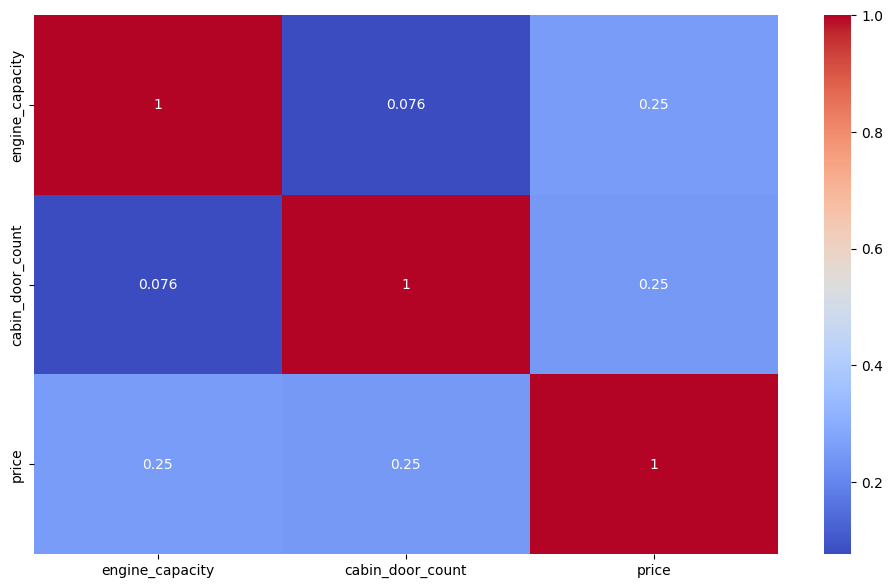

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(vehicles_df.corr(), annot=True, cmap="coolwarm")

* engine capcity is not important predictors of price

 ##### Average price by brand

In [5]:
grouped_by_brand = vehicles_df.groupby('brand')
print(grouped_by_brand['price'].mean()) 

brand
BMW             90049.593682
MINI            89822.360671
Rolls-Royce    926181.200242
Name: price, dtype: float64


In [6]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

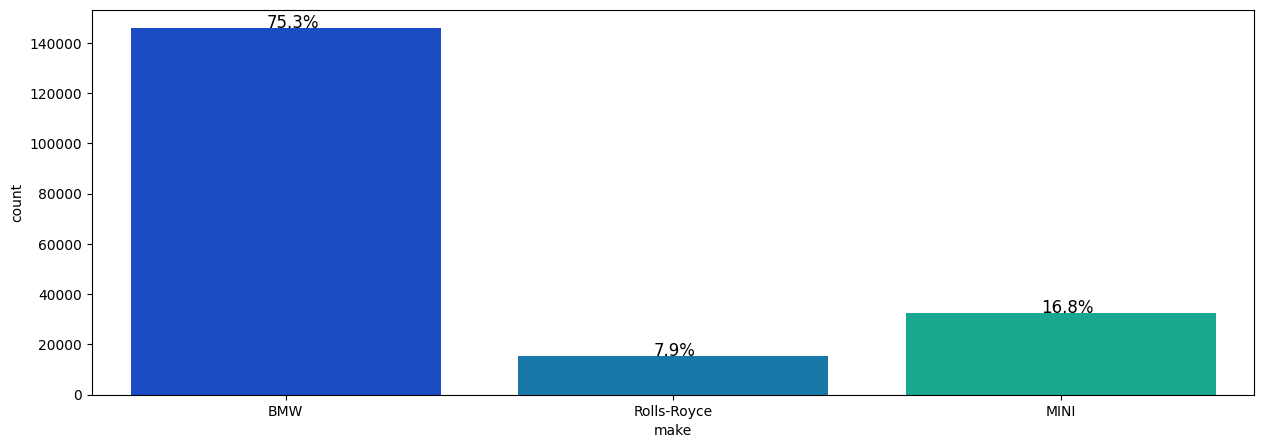

In [28]:
#sns.countplot(x='make',data=vehicles_df)
#plt.show()

plt.figure(figsize=(15,5))
ax = sns.countplot(x='make',data=vehicles_df,palette='winter') #sns.countplot(vehicles_df["make"],palette='winter')
perc_on_bar(ax,vehicles_df["make"])

* There are more BMWs cars in the data set, followed by MINI

In [70]:
vehicles_df.describe().T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
engine_capacity,193705.0,3.623020,1.452653,1.00,2.40,3.70,4.9,6.00
cabin_door_count,193705.0,3.615637,1.495540,2.00,2.00,5.00,5.0,5.00
price,193705.0,156304.637331,246544.024903,30000.72,62561.73,95262.21,127659.6,1499964.54


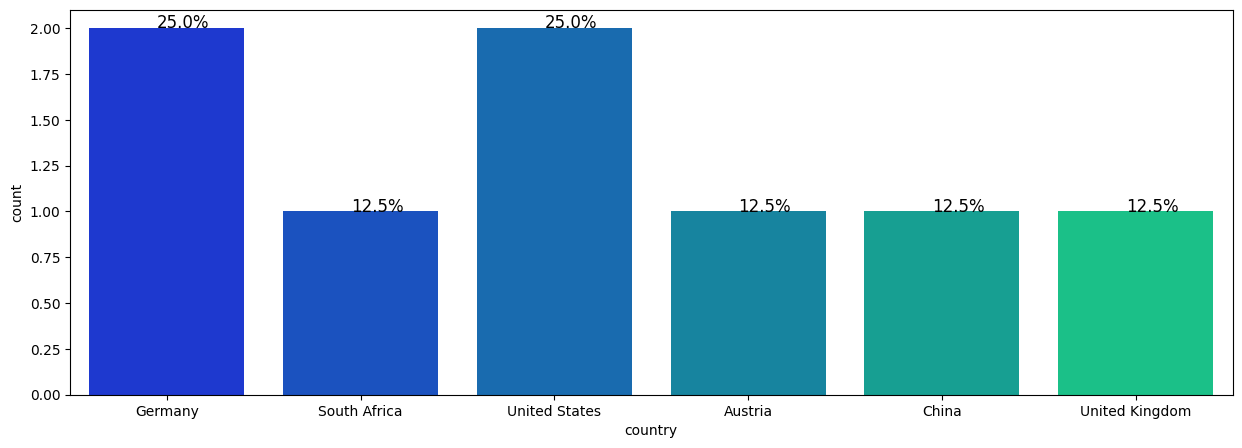

In [31]:

plt.figure(figsize=(15,5))
ax = sns.countplot(x='country',data=plant_df,palette='winter') #sns.countplot(vehicles_df["make"],palette='winter')
perc_on_bar(ax,plant_df["country"])

* Germany and United states Manufacture 50% of the cars

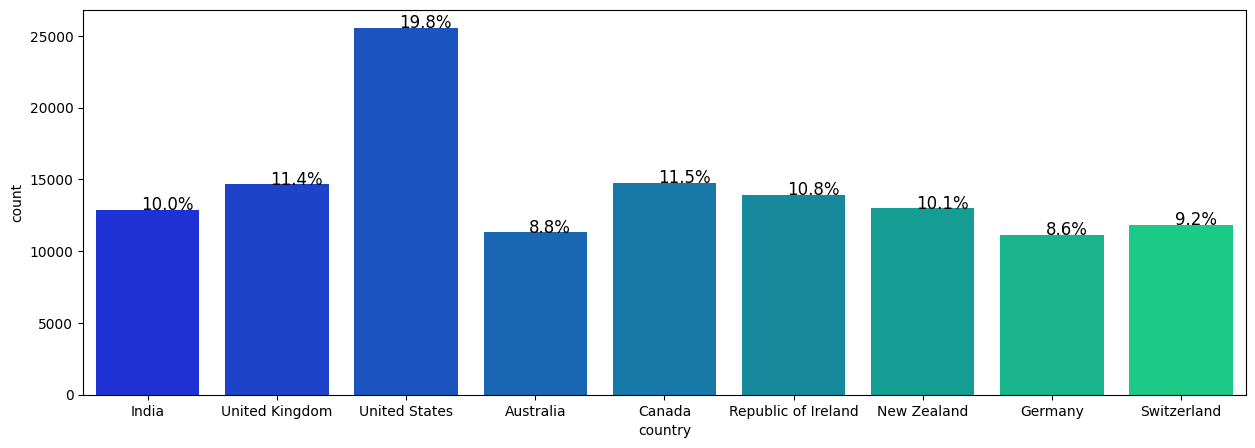

In [32]:
#customers_df.describe().T  # quick summary of numeric features

plt.figure(figsize=(15,5))
ax = sns.countplot(x='country',data=customers_df,palette='winter') #sns.countplot(vehicles_df["make"],palette='winter')
perc_on_bar(ax,customers_df["country"])

*  United states has most customers followed by Canada and  United kingdom

In [75]:
dealers_df.describe().T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
bmw_owned,1250.0,0.5128,0.500036,0.0,0.0,1.0,1.0,1.0


#### Find the number of vehicles per model

<AxesSubplot:xlabel='count', ylabel='model'>

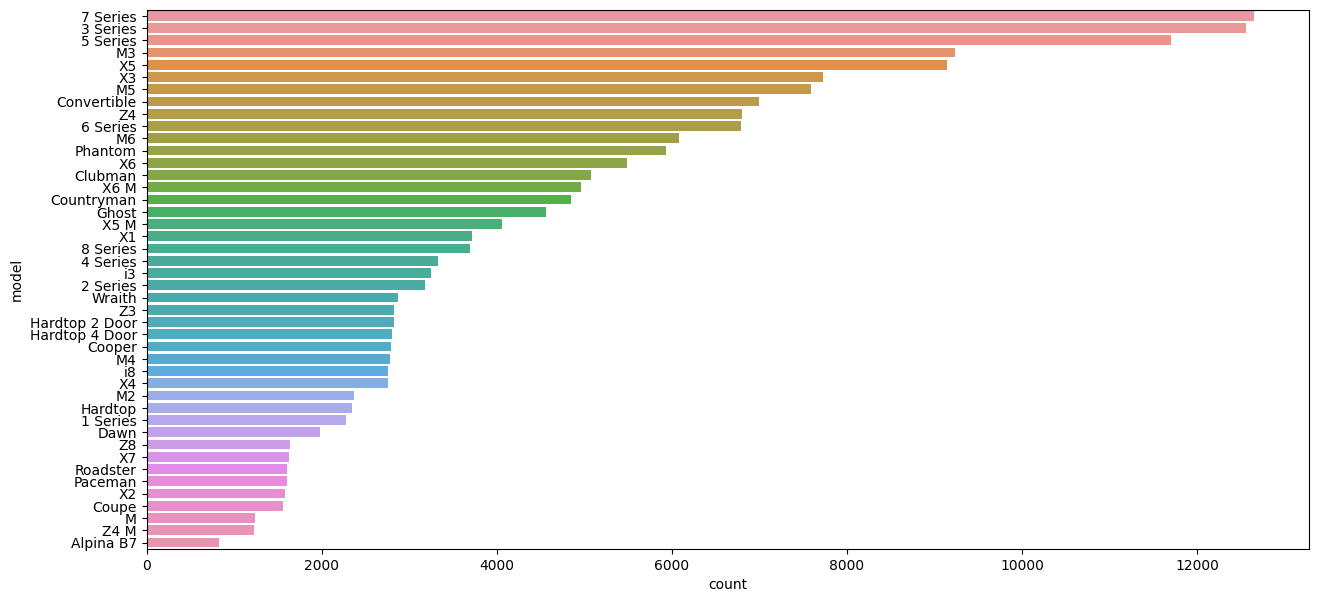

In [7]:
# Write code to provide statistical information about each dataframe that you just loaded.
#vehicles_df['model'].value_counts() 
plt.figure(figsize=(15, 7))
sns.countplot(y="model", data=vehicles_df, order=vehicles_df["model"].value_counts().index)
# Write your code below

In [61]:
vehicles_df['make'].value_counts() 

BMW            145887
MINI            32460
Rolls-Royce     15358
Name: make, dtype: int64

In [62]:
vehicles_df['production_country'].value_counts() 

US    44917
DE    44300
UK    37712
AT    22366
ZA    22301
CN    22109
Name: production_country, dtype: int64

In [63]:
vehicles_df['fuel_type'].value_counts() 

diesel                   32589
petrol and electric      32345
petrol                   32341
hydrogen and electric    32331
electric                 32143
hyrdogen                 31956
Name: fuel_type, dtype: int64

In [64]:
vehicles_df['transmission_type'].value_counts() 

steptronic    64703
manual        64703
automatic     64299
Name: transmission_type, dtype: int64

### Perform all the relevant join operations between the datasets.

Hint! - Relationship between the datasets is mentioned above


In [8]:
vehicles_df.rename(columns={'prod_plant_id': 'plant_id'}, inplace=True)

In [9]:
df_vehicleProdPlant = pd.merge(vehicles_df,plant_df,on='plant_id',how='inner')

In [47]:
df_vehicleProdPlant.head()

,vin,order_number,model_key,paint_code,paint_descr,make,model,category,brand,fuel_type,...,steering_wheel_position,cabin_door_count,engine_series,drive_type,price,currency,plant_name,country,iso_country_code,address
0,1G8MG31X28U3Y1GZM,ORDIN4B327A623,JXJM,BL2C,BLACK SAPPHIRE METALLIC,BMW,X1,SUV,BMW,diesel,...,RL,5,X2B90,FWD,121044.22,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
1,1GT5C3BKXA02NURAL,ORDIN93885C722,2X31,SOME,SUNSET ORANGE BLUE,BMW,5 Series,Sedan,BMW,hydrogen and electric,...,LL,2,XMT70,FWD,67771.31,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
2,3GBC4C1G19T3UB0GU,ORDIN518787410,MSR3,SOME,SUNSET ORANGE BLUE,BMW,X6,SUV,BMW,electric,...,LL,2,XMT70,RWD,133647.40,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
3,2C3KK63H28R5705ZM,ORDIN9F11D2560,JXJM,STRM,STORM BAY METALLIC,BMW,2 Series,"Coupe, Convertible",BMW,petrol,...,RL,2,X2B90,RWD,53737.79,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
4,YS3EH58G31WLWHS42,ORDIND4D64B291,MSR3,ALP3F,ALPINWEISS III,BMW,M3,"Convertible, Coupe",BMW,diesel,...,RL,5,X2T90,AWD,81897.81,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."


In [10]:
# Perform the queries to perform the relevant dataframe join operations.
df_customerOrder = pd.merge(customers_df,orders_df,on='customer_id',how='inner')

In [11]:
df_customerOrder.head()

,customer_id,first_name,last_name,company,sex,date_of_birth,customer_address,street_address,country,city,...,contact_number,contact_email,postal_code,customer_locale,order_number,sales_rep_number,dealer_number,iso_country_code_y,order_date,order_status
0,CNIN29159162,Lakshay,Krishnan,Personal,female,1983-04-04,"H.No. 776\nVala Street, Visakhapatnam 873845","32, Sarraf Ganj",India,Anantapur,...,00685812523,lakshay.krishnan@hotmail.in,825660,en_IN,ORDIN4B327A623,SNIN281695106,DNIN28169,IN,2010-08-03,delivered
1,CNIN9CCF4863,Samaira,Subramaniam,"Kannan, Shetty and Mann",female,1994-04-04,"H.No. 139, Sankaran Street, Nellore-174106","H.No. 78, Biswas Circle",India,Kavali,...,+915359660413,samaira.subramaniam@zoomba.com,897841,en_IN,ORDINA32307615,SNIN386702881,DNIN38670,IN,2004-03-22,delivered
2,CNIN9CCF4863,Samaira,Subramaniam,"Kannan, Shetty and Mann",female,1994-04-04,"H.No. 139, Sankaran Street, Nellore-174106","H.No. 78, Biswas Circle",India,Kavali,...,+915359660413,samaira.subramaniam@zoomba.com,897841,en_IN,ORDIN974391495,SNIN317855261,DNIN31785,IN,2004-10-19,delivered
3,CNIN48C97855,Jhanvi,Tak,Personal,male,1999-03-17,"35\nDar, Khandwa-004766",06/71\nMann Nagar,India,Ambala,...,+912638760535,jhanvi.tak@gmail.org,677550,en_IN,ORDINBA0C53437,SNIN252727200,DNIN25272,IN,2006-12-20,delivered
4,CNIN37D52675,Dishani,Chakrabarti,Personal,female,1990-01-20,"77/08, Dhar Zila\nBelgaum-709476",79\nGour Path,India,Gudivada,...,01936978689,dishani.chakrabarti@stdbank.info,130341,en_IN,ORDIN179530629,SNIN170344819,DNIN17034,IN,2022-07-27,in progress


In [12]:
sales_df.rename(columns={'dealer_number': 'dealer_code'}, inplace=True)

In [13]:
df_SalesDealer = pd.merge(sales_df,dealers_df,on='dealer_code',how='inner')

In [14]:
df_SalesDealer.head()

,sales_number,first_name,last_name,personnel_number,employment_type,department_code,dealer_code,sex,date_of_birth,customer_address,...,dealer_type,bmw_owned,dealer_tier,primary_contact,dealer_city,iso_country_code_y,dealer_contact,dealer_email,postal_code_y,dealer_locale
0,SNIN281693284,Akarsh,Bakshi,EMIN28169BMW5779,permanent,FSP02,DNIN28169,male,1998-04-01,57/80\nGoyal Road\nAmritsar 583649,...,service provider,0,tier3,Taimur Das,Kalyan-Dombivli,IN,+915125193785,Taimur.Das@bmwsalesteam.de,731403,en_IN
1,SNIN281691801,Divyansh,Goel,EMIN28169BMW5980,contractor,FSP02,DNIN28169,male,1991-01-11,"83/360, Chawla Ganj\nAmbarnath 637472",...,service provider,0,tier3,Taimur Das,Kalyan-Dombivli,IN,+915125193785,Taimur.Das@bmwsalesteam.de,731403,en_IN
2,SNIN281694483,Pari,Bedi,EMIN28169BMW5854,permanent,FSP01,DNIN28169,male,1995-09-20,H.No. 95\nDass Zila\nSangli-Miraj & Kupwad-904110,...,service provider,0,tier3,Taimur Das,Kalyan-Dombivli,IN,+915125193785,Taimur.Das@bmwsalesteam.de,731403,en_IN
3,SNIN281698547,Lakshit,Anne,EMIN28169BMW3331,permanent,FSP09,DNIN28169,female,1978-06-04,"H.No. 39\nLoyal Nagar, Rajahmundry 169701",...,service provider,0,tier3,Taimur Das,Kalyan-Dombivli,IN,+915125193785,Taimur.Das@bmwsalesteam.de,731403,en_IN
4,SNIN281695106,Jayan,Bora,EMIN28169BMW5583,contractor,FSP02,DNIN28169,female,1994-01-17,"988, Chaudry Ganj\nBangalore-251753",...,service provider,0,tier3,Taimur Das,Kalyan-Dombivli,IN,+915125193785,Taimur.Das@bmwsalesteam.de,731403,en_IN


#### Question: Did you perform any joins on the datasets. If yes, what joins. Also what information was available after the joins were performed.

#### *Answer*: 

* df_SalesDealer Join sales rep and dealership dataframe to get sales representative dealership
* df_customerOrder Join customer and order dataframe to get customer orders
* df_vehicleProdPlant Join vechicle and plant dataframe to get vehicle plant production

### Perform All the standard Exploratory Data Analysis in the sections that follow to provide information to the Business users about the data. Report your findings in the form of Graphs or Response statements

Text(0.5, 1.0, 'Distribution of Vehicles by Plant and Country')

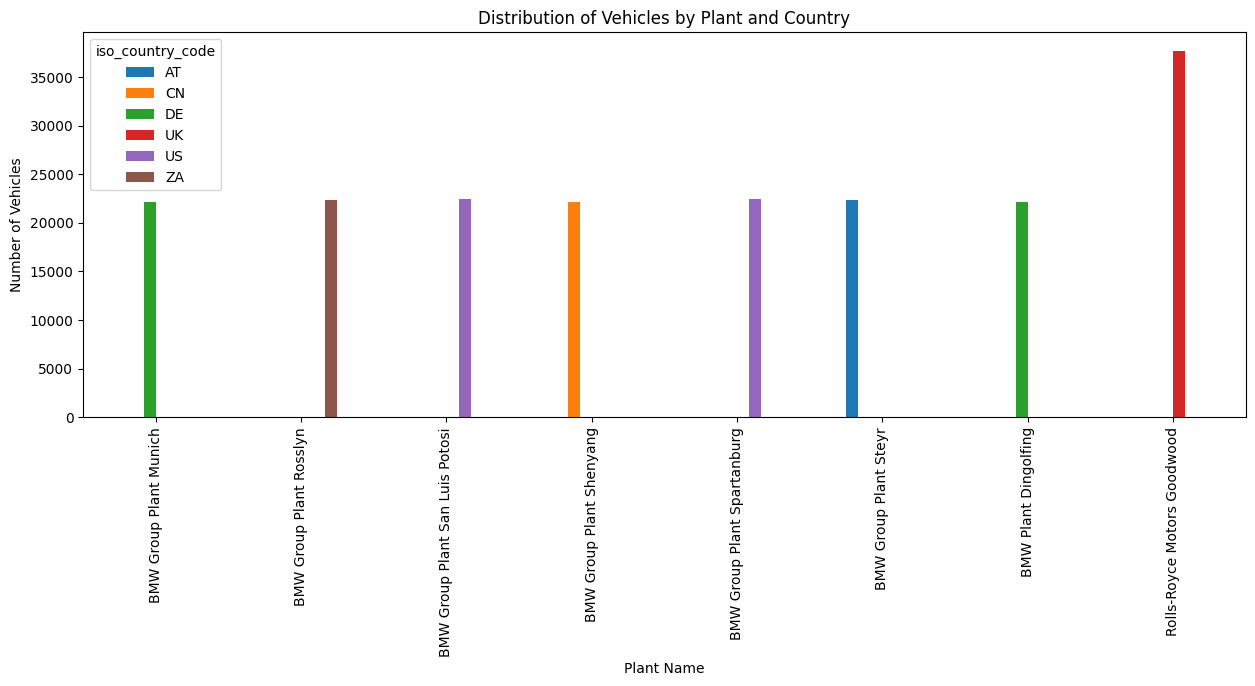

In [64]:
 
grouped_data = df_vehicleProdPlant.groupby(['plant_name', 'iso_country_code'])['vin'].count().unstack()
grouped_data.plot(kind='bar', figsize=(15,5)) 
plt.xlabel('Plant Name')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Plant and Country')
#plt.show()

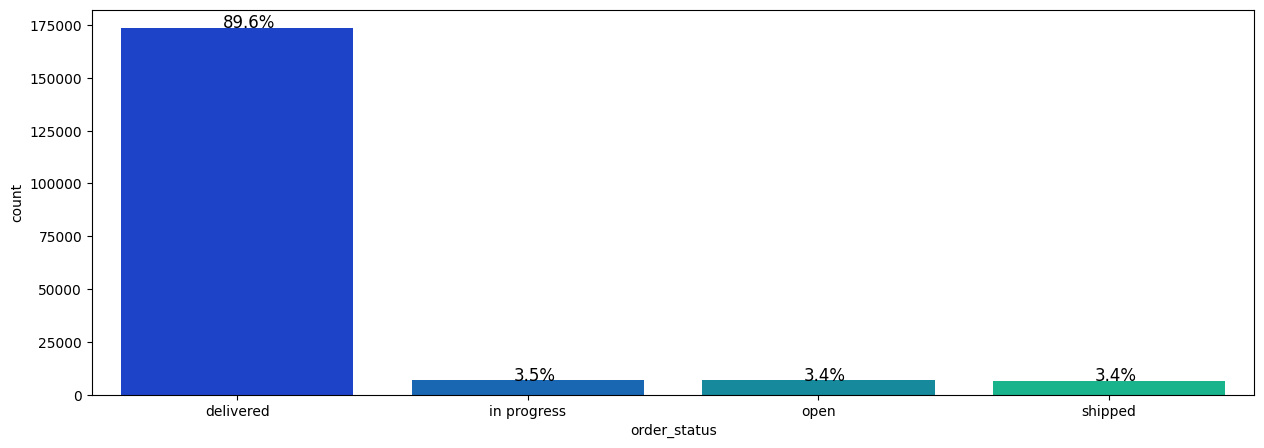

In [67]:
# Write your own exploratory data analysis on the ingested dataframe and report on the different findings.
# also provide visual aids for each finding.plt.figure(figsize=(15,5))
plt.figure(figsize=(15,5))
ax = sns.countplot(x='order_status',data=df_customerOrder,palette='winter') 
perc_on_bar(ax,df_customerOrder["order_status"])

* 89,6 % of customer orders have been delivered

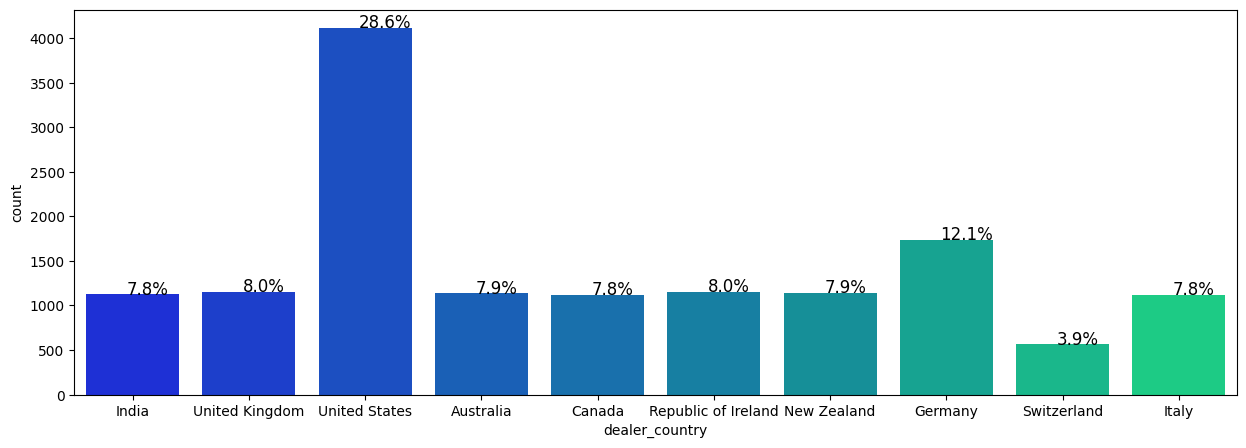

In [70]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='dealer_country',data=df_SalesDealer,palette='winter') 
perc_on_bar(ax,df_SalesDealer["dealer_country"])

* United states has the most dealerships followed by Germany

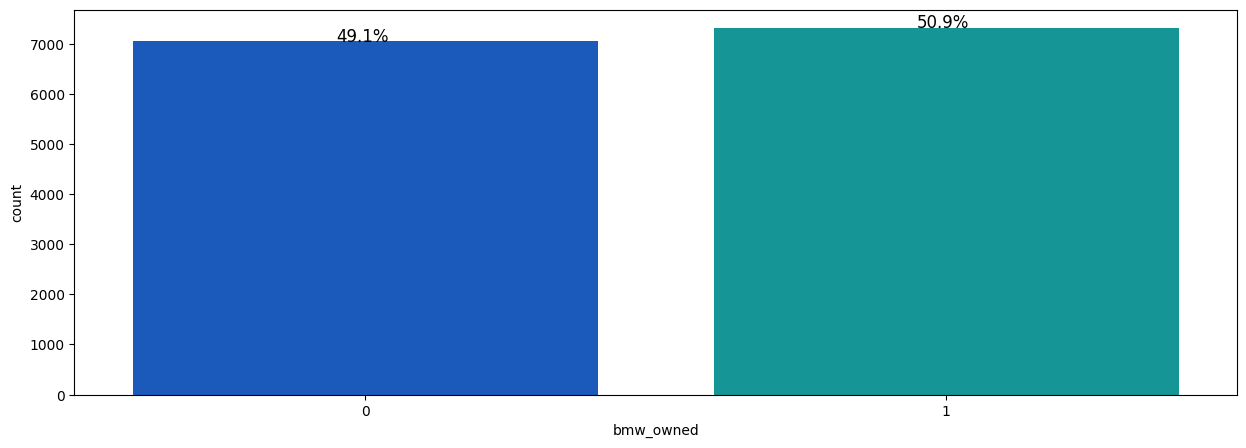

In [72]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='bmw_owned',data=df_SalesDealer,palette='winter') 
perc_on_bar(ax,df_SalesDealer["bmw_owned"])

* BMW owns just over 50% of the dealerships 

In [15]:
#df_customerOrder.info()
df_SalesDealer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14364 entries, 0 to 14363
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sales_number        14364 non-null  object
 1   first_name          14364 non-null  object
 2   last_name           14364 non-null  object
 3   personnel_number    14364 non-null  object
 4   employment_type     14364 non-null  object
 5   department_code     14364 non-null  object
 6   dealer_code         14364 non-null  object
 7   sex                 14364 non-null  object
 8   date_of_birth       14364 non-null  object
 9   customer_address    14364 non-null  object
 10  street_address      14364 non-null  object
 11  country             14364 non-null  object
 12  city                14364 non-null  object
 13  iso_country_code_x  14364 non-null  object
 14  contact_number      14364 non-null  object
 15  email               14364 non-null  object
 16  postal_code_x       14

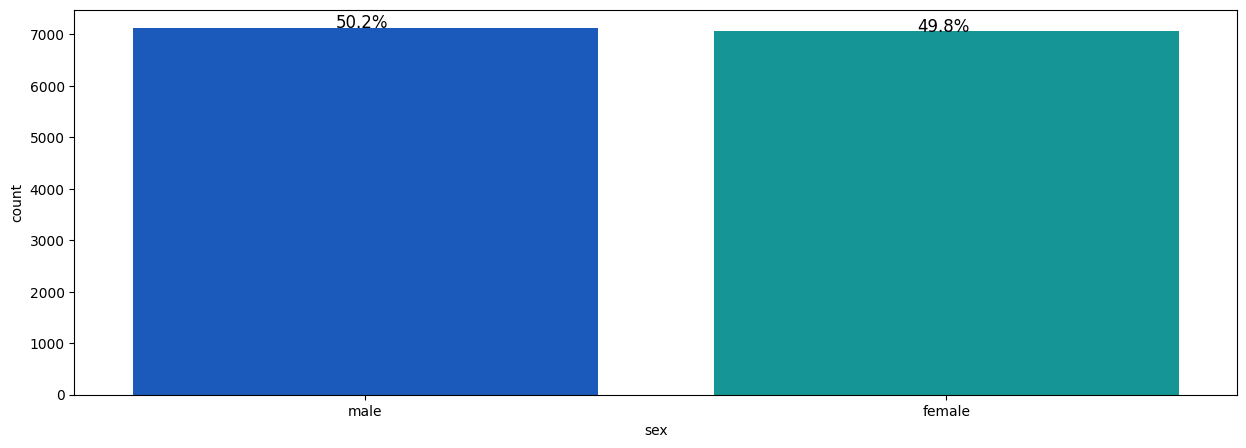

In [77]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='sex',data=sales_df,palette='winter') 
perc_on_bar(ax,sales_df["sex"])

* In the sales representative department, both sexes are equally represented.

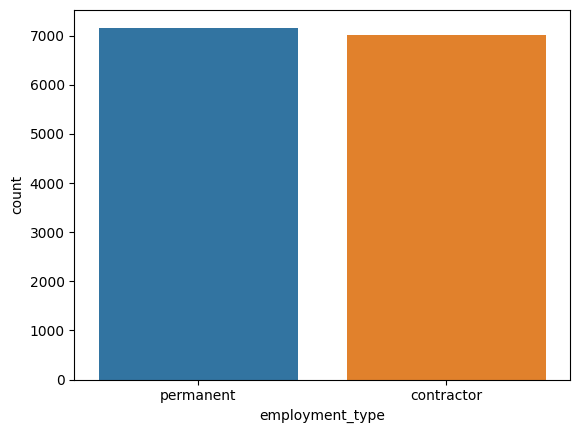

In [16]:
sns.countplot(x='employment_type',data=sales_df)
plt.show()

* More than half of the sales representatives are full-time employees.

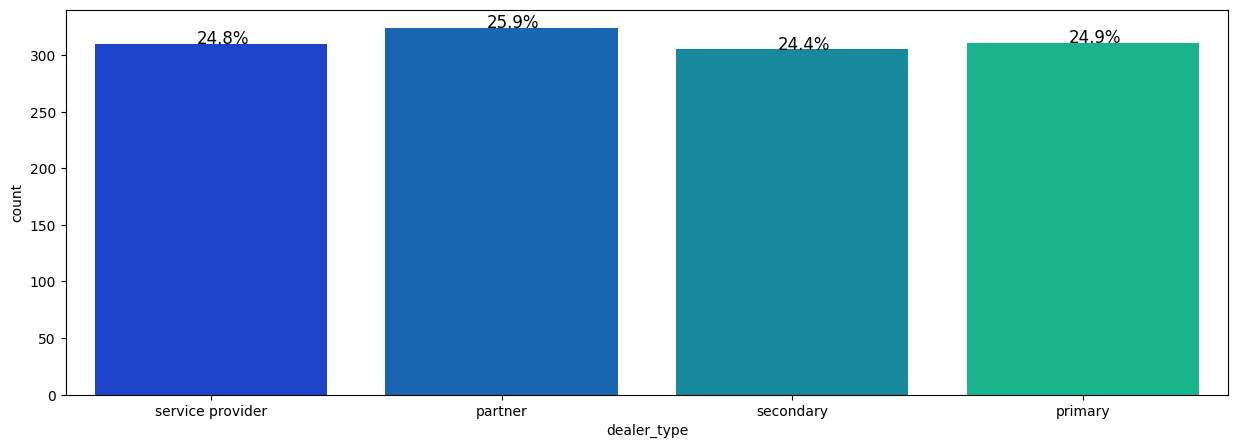

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='dealer_type',data=dealers_df,palette='winter') 
perc_on_bar(ax,dealers_df["dealer_type"])

* There are four equally dispersed types of dealerships.

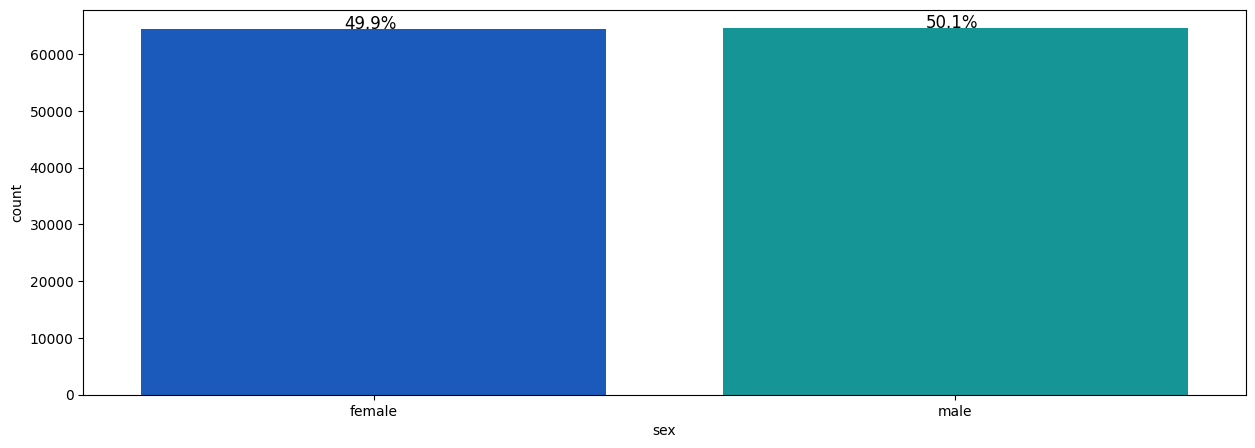

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='sex',data=customers_df,palette='winter') 
perc_on_bar(ax,customers_df["sex"])

* BMW customer base has both sexes are equally represented.

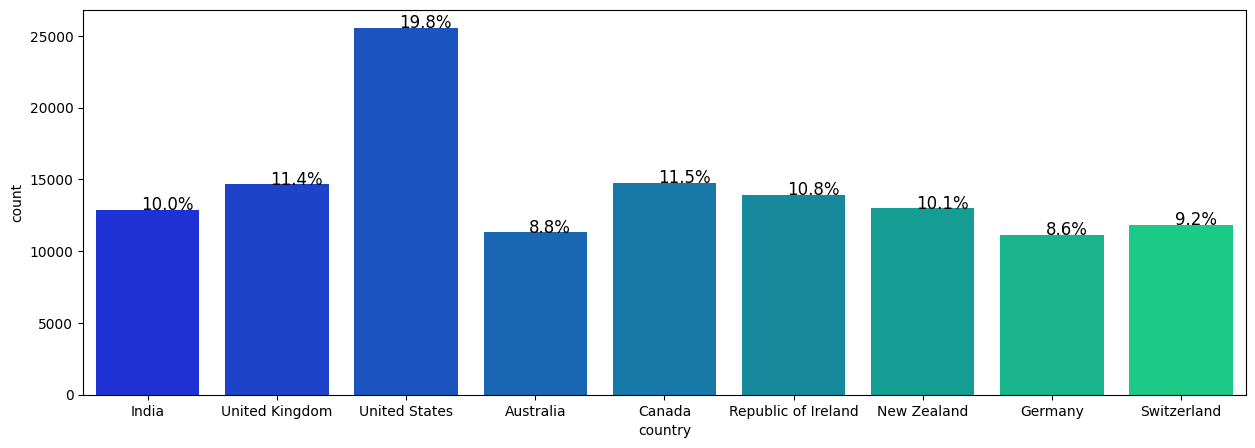

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='country',data=customers_df,palette='winter') 
perc_on_bar(ax,customers_df["country"])

* Most customers are in United Sates

In [32]:
df_customerOrder.head()

,customer_id,first_name,last_name,company,sex,date_of_birth,customer_address,street_address,country,city,...,contact_number,contact_email,postal_code,customer_locale,order_number,sales_rep_number,dealer_number,iso_country_code_y,order_date,order_status
0,CNIN29159162,Lakshay,Krishnan,Personal,female,1983-04-04,"H.No. 776\nVala Street, Visakhapatnam 873845","32, Sarraf Ganj",India,Anantapur,...,00685812523,lakshay.krishnan@hotmail.in,825660,en_IN,ORDIN4B327A623,SNIN281695106,DNIN28169,IN,2010-08-03,delivered
1,CNIN9CCF4863,Samaira,Subramaniam,"Kannan, Shetty and Mann",female,1994-04-04,"H.No. 139, Sankaran Street, Nellore-174106","H.No. 78, Biswas Circle",India,Kavali,...,+915359660413,samaira.subramaniam@zoomba.com,897841,en_IN,ORDINA32307615,SNIN386702881,DNIN38670,IN,2004-03-22,delivered
2,CNIN9CCF4863,Samaira,Subramaniam,"Kannan, Shetty and Mann",female,1994-04-04,"H.No. 139, Sankaran Street, Nellore-174106","H.No. 78, Biswas Circle",India,Kavali,...,+915359660413,samaira.subramaniam@zoomba.com,897841,en_IN,ORDIN974391495,SNIN317855261,DNIN31785,IN,2004-10-19,delivered
3,CNIN48C97855,Jhanvi,Tak,Personal,male,1999-03-17,"35\nDar, Khandwa-004766",06/71\nMann Nagar,India,Ambala,...,+912638760535,jhanvi.tak@gmail.org,677550,en_IN,ORDINBA0C53437,SNIN252727200,DNIN25272,IN,2006-12-20,delivered
4,CNIN37D52675,Dishani,Chakrabarti,Personal,female,1990-01-20,"77/08, Dhar Zila\nBelgaum-709476",79\nGour Path,India,Gudivada,...,01936978689,dishani.chakrabarti@stdbank.info,130341,en_IN,ORDIN179530629,SNIN170344819,DNIN17034,IN,2022-07-27,in progress


In [37]:
df_vehicleProdPlant.head()

,vin,order_number,model_key,paint_code,paint_descr,make,model,category,brand,fuel_type,...,steering_wheel_position,cabin_door_count,engine_series,drive_type,price,currency,plant_name,country,iso_country_code,address
0,1G8MG31X28U3Y1GZM,ORDIN4B327A623,JXJM,BL2C,BLACK SAPPHIRE METALLIC,BMW,X1,SUV,BMW,diesel,...,RL,5,X2B90,FWD,121044.22,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
1,1GT5C3BKXA02NURAL,ORDIN93885C722,2X31,SOME,SUNSET ORANGE BLUE,BMW,5 Series,Sedan,BMW,hydrogen and electric,...,LL,2,XMT70,FWD,67771.31,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
2,3GBC4C1G19T3UB0GU,ORDIN518787410,MSR3,SOME,SUNSET ORANGE BLUE,BMW,X6,SUV,BMW,electric,...,LL,2,XMT70,RWD,133647.40,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
3,2C3KK63H28R5705ZM,ORDIN9F11D2560,JXJM,STRM,STORM BAY METALLIC,BMW,2 Series,"Coupe, Convertible",BMW,petrol,...,RL,2,X2B90,RWD,53737.79,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."
4,YS3EH58G31WLWHS42,ORDIND4D64B291,MSR3,ALP3F,ALPINWEISS III,BMW,M3,"Convertible, Coupe",BMW,diesel,...,RL,5,X2T90,AWD,81897.81,USD,BMW Group Plant Steyr,Austria,AT,"BMW Group Plant Steyr, Hinterbergerstrasse 440..."


In [36]:
duplicate_values.shape

(129338, 21)

In [ ]:
# Use the matplotlib libraries or other graphing libraries and create charts to support your findings
import matplotlib

### Report all your Findings:

Report your findings in bullet points.
Example: For illustration purpose only - replace below with your own findings and support with Evidence
1. The US plant manufactured the most number of vehicles in 2023 etc. There were 30,000 vehicles manufactured at the plant etc.
2. Most customers are in United Sates
3. BMW customer base has both sexes are equally represented.
4. There are four equally dispersed types of dealerships.
5. United states has the most dealerships followed by Germany
6. 89,6 % of customer orders have been delivered

## `Acceptance Criteria`
The following acceptance criteria must be met:

1. Perform Exploratory data Analysis and present your results as observations.
2. Python Graph libraries must be used to plot graphs to support your findings.
3. Comment your notebook file with markdown indicating observations: and write statements to indicate your observations.
4. Perform Analysis fo the Data using Spark or Pandas